# Data Science Technology and Systems

### Master of Data Science

### Bharath Shivakumar - U3241627

# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Given the complexity and unpredictability of the factors affecting flight delays, machine learning is a suitable solution for this issue. Given the dynamic nature of air travel conditions, machine learning models are capable of efficiently learning complex patterns from past data. Moreover, ML provides processing a wide range of features, adaptability to shifting patterns and scalability to manage massive datasets. Because flight delay forecasts have real world repercussions, it is imperative to solve data quality issues, guarentee interpretability of the model, and take ethical considerations into account.

### 2. Formulate the business problem, success metrics, and desired ML output.

Improving the passenger experience for flights that may be delayed due to weather is the business challenge. When booking flights to or from the busiest airports for domestic travel within the United States, the purpose is to notify clients about probable delays.

Success Metrics:
1. Higher Accuracy for predictions
2. Higher Precision rate and recall rate
3. Customer Satisfaction

For every flight, the machine learning model need to generate a binary classification that indicates whether or not the weather will cause a delay. Customers can be informed about the possibility of a delay by the booking platform through the use of probabilities or confidence scores as the output. In order to generate predictions for various scenarios, the model should also be able to handle inputs like the airport, date, time, airline and other pertininent features.

In conclusion, a trustworthy forecast that alerts clients to the likelihood of a flight delay would be the ideal result, empowering them to make better choices when purchasing tickets.

### 3. Identify the type of ML problem you’re dealing with.

The business issue can be described as classification problem. The task at hand involves making predictions about the likelihood of delays of the flights caused by various reasons. When a model uses classification, it categorises the instances into groups. In this case it "Delay" or "No Delay".

Key characteristics of the classification problem:
1. Two distinct classes: Delayed or Not Delayed
2. The goal is to predict the class label of a flight based on features such as airport, date, time, airline etc.
3. Evaluation Metrics
4. The model is supposed to show an output as a probability to understand the likelihood of the delay.
5. Training and understanding the historical data.

Making a choice between two possible outcomes is the goal of classification, a popular kind of machine learning issue that works well in situations when cases fall into one of two mutually exclusive classes.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [2]:
#We mention the zip folder path
#We define the base or the project path
#Then we define a path to store our zipped files
#Finally we define a path to store our csv files
zip_path = '../DSTS_Final_Assignment/'
base_path = '../DSTS_Final_Assignment'
zipped_files_path = '../DSTS_Final_Assignment/data_zip'
csv_base_path = '../DSTS_Final_Assignment/data/'

!mkdir -p {csv_base_path}

The syntax of the command is incorrect.


In [3]:
#This function extracts the zipped folder from the list of files and folders
zip_files = [file for file in os.listdir(zip_path) if file.endswith('.zip')]


print(f"The number of zipped files is {len(zip_files)}")

The number of zipped files is 1


#### Extract CSV files from ZIP files

In [4]:
#In this function, we try extract the zipped files from a zipped folder
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

#We run this loop to extract the zipped files from the zipped folder to a new folder
for file in zip_files:
    zip2csv(file, zipped_files_path)

print("Files Extracted")

Extracting OneDrive_1_30-10-2023.zip 
Files Extracted


In [5]:
#We need to understand how many ziiped files we have
csv_files = [os.path.join(zipped_files_path, file) for file in os.listdir(zipped_files_path) if file.endswith('.zip')]

len(csv_files)

60

In [6]:
#We create another for loop to extract the csv files from the individual zipped files
for file in csv_files:
    zip2csv(file, csv_base_path)

Extracting ../DSTS_Final_Assignment/data_zip\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting ../DSTS_Final_Assignment/data_zip\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting ../DSTS_Final_Assignment/data_zip\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting ../DSTS_Final_Assignment/data_zip\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting ../DSTS_Final_Assignment/data_zip\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting ../DSTS_Final_Assignment/data_zip\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting ../DSTS_Final_Assignment/data_zip\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting ../DSTS_Final_Assignment/data_zip\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extracting ../DSTS_Final_Assignment/data_zip\On_Time_Reporting_Carrie

In [7]:
#In this function we try to find how many csv files we have extracted.
extracted_files = [file for file in os.listdir(csv_base_path) if file.endswith('.csv')]

#We display the total number of files extracted.
print(f"The number of extracted files are {len(extracted_files)}")

The number of extracted files are 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [8]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [9]:
#We load a sample csv file as per the question requirement
df_temp = pd.read_csv("data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv")

**Question**: Print the row and column length in the dataset, and print the column names.

In [10]:
#We check the number of rows and columns using this function and display it.
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [11]:
#We print the first 10 columns of the dataset
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [12]:
#We print all the column name of the dataset
print(f'The column names are :')
print('#########')
for col in df_temp.columns:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [13]:
#First we create a function to identify the column names which contains the word 'Del'
Cols_Del = [col for col in df_temp.columns if 'Del' in col]

print("Columns which contain the word 'DEL' are \n")
print("###################################")

#We use a loop to print all the column names which have the word 'Del'
for col in Cols_Del:
    print(col)

Columns which contain the word 'DEL' are 

###################################
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [14]:
#1. We print the number of rows and columns
num_rows, num_columns = df_temp.shape
print("The rows and columns are ", num_rows , " and ", num_columns)


#2. We print the years included in the dataset
num_years = df_temp['Year'].unique()
print("The year in this dataset is: ", num_years)

for year in num_years:
    num_months = df_temp[df_temp['Year'] == year]['Month'].unique()
    print("The month covered in this dataset is the month: ", num_months)

#3. We print the date range for this dataset
print("The date range for data is :" , min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))


#4. We print the airlines included in this dataset
print("The airlines covered in this dataset are: ", list(df_temp['Reporting_Airline'].unique()))

#5. We print the origin and destination airports covered
print("The Origin airports covered are: ", list(df_temp['Origin'].unique()))
print("The Destination airports covered are: ", list(df_temp['Dest'].unique()))

The rows and columns are  585749  and  110
The year in this dataset is:  [2018]
The month covered in this dataset is the month:  [9]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [15]:
#We count the number of origin and destination airports
counts = pd.DataFrame({'Origin':df_temp['Origin'].value_counts(), 'Destination':df_temp['Dest'].value_counts()})
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [16]:
#We sort the values by number of flights
counts.sort_values(by=['Origin','Destination'],ascending=False).head(15 )

,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

#### Answer:

The complicated process of predicting whether a flight will be delayed, usually calls for machine learning models and a dataset containing pertinent characteristics. The forecast of flight delays is based on a number of variables, such as weather, air traffic, airline schedules and historical data.

This could include steps like Data collection, preprocessing, feature engineering, model selection, model training, model evulations and other steps.

It's crucial to remember that there are a lot of variables that might affect flight delay forecasts, and the accuracy of those predictions is dependent on the caliber and volume of the data utilized. If you use such models in practice, you might also need to think about the ethical and legal ramifications.


---------------------------------------------------------------------------------------------------------------------------

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [17]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    master_df = pd.DataFrame()
    
    #We create a loop to read the csv files and filter the desired columns
    for file in csv_files:
        df = pd.read_csv(file)
        df = df[filter_cols]
        
        #We choose only the subset columns and values
        for col, val in zip(subset_cols, subset_vals):
            df = df[df[col].isin(val)]
        
        #We join the data using this function
        master_df = pd.concat([master_df,df], ignore_index = True)

    #We write this function to write the data into a single csv file    
    master_df.to_csv(file_name, index = False)   

In [18]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

In [20]:
#We give the path for the data
data_path = 'data'

#We find the csv files in the folder to access them
csv_files = [os.path.join(data_path, file) for file in os.listdir(data_path) if file.endswith('.csv')]

['data\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv', 'data\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv', 'data\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv', 'data\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv', 'data\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2.csv', 'data\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_3.csv', 'data\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_4.csv', 'data\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5.csv', 'data\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_6.csv', 'data\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_7.csv', 'data\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_8.csv', 'data\\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_9.csv', 'data\\On_Time_Reporting

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [22]:
#This function is to record the time that it reads the file
start = time.time()

#We give this as the name of the file
combined_csv_filename = "combined_files.csv"

#We run our defined function to combine all the csv files
combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)

#This prints the time taken for the csv files to be combined
print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

csv's merged in 2.57 minutes


#### Load dataset

Load the combined dataset.

In [472]:
#We load the dataset
data = pd.read_csv('combined_files.csv')

Print the first 5 records.

In [473]:
#We print the first 5 rows
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [474]:
#1. We print the number of rows and columns
num_rows, num_columns = data.shape
print("The rows and columns are ", num_rows , " and ", num_columns)

#2. We print the years included in the dataset
num_years = data['Year'].unique()
print("The year in this dataset is: ", num_years)

num_months = data['Month'].unique()
print("The month covered in this dataset is the month: ", num_months)

#3. We print the date range for this dataset
print("The date range for data is :" , min(data['FlightDate']), " to ", max(data['FlightDate']))


#4. We print the airlines included in this dataset
print("The airlines covered in this dataset are: ", list(data['Reporting_Airline'].unique()))

#5. We print the origin and destination airports covered
print("The Origin airports covered are: ", list(data['Origin'].unique()))
print("The Destination airports covered are: ", list(data['Dest'].unique()))

The rows and columns are  1658130  and  20
The year in this dataset is:  [2014 2015 2016 2017 2018]
The month covered in this dataset is the month:  [ 1 10 11 12  2  3  4  5  6  7  8  9]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [475]:
#We rename the given column name
data.rename(columns={"ArrDel15": "is_delay"}, inplace=True) # Enter your code here

#We print to see if the data is right
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [476]:
#We detect the number of null values in the column
data.isnull().sum(axis = 0)

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [477]:
#We have removed the NA values, using the hint above
#We decided to remove the NA values, because it was only 1.3% of the data
data = data[~data[['ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime']].isnull().all(axis = 1)]

data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


In [478]:
#We display to see if we have the right data
data.isnull().sum()

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
AirTime              0
dtype: int64

Get the hour of the day in 24-hour time format from CRSDepTime.

In [479]:
#We run this function to get the 24 hour time format
data['DepHourofDay'] = data['CRSDepTime'] // 100

In [480]:
#We check the data for our results
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime,DepHourofDay
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0,21
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0,9
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,...,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0,18
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,...,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0,16
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,...,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0,7


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

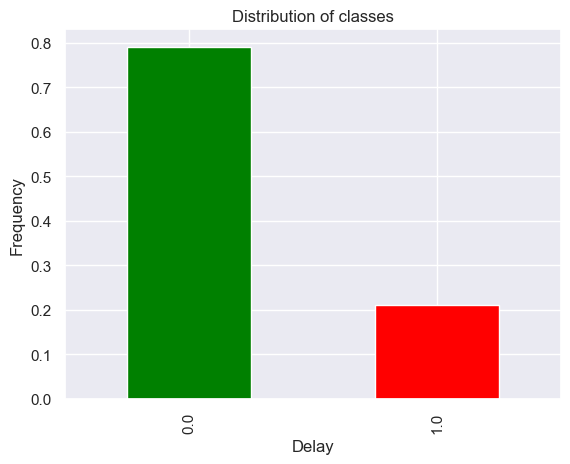

In [481]:
#We have shown a plot if the flight has been delayed or not.
#The bar is green if the flight is not delayed and the bar is red if the flight is delayed.
(data.groupby('is_delay').size()/len(data)).plot(kind='bar', color = ['green', 'red'])
plt.xlabel("Delay")
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

It is evident from the barplot that most of the flights in the dataset belong to the "0.0" which is the group which represents "Not Delayed", which is shown by the higher bar which is almost 0.8. This suggests that a sizable perecntage of the dataset's flights are not delayed. The category "1.0" which represents "Delayed" stands at 0.2, this suggests that a lower percentage of flights have been delayed.
With this we are able to understand an overall distribution between delay and no delay.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

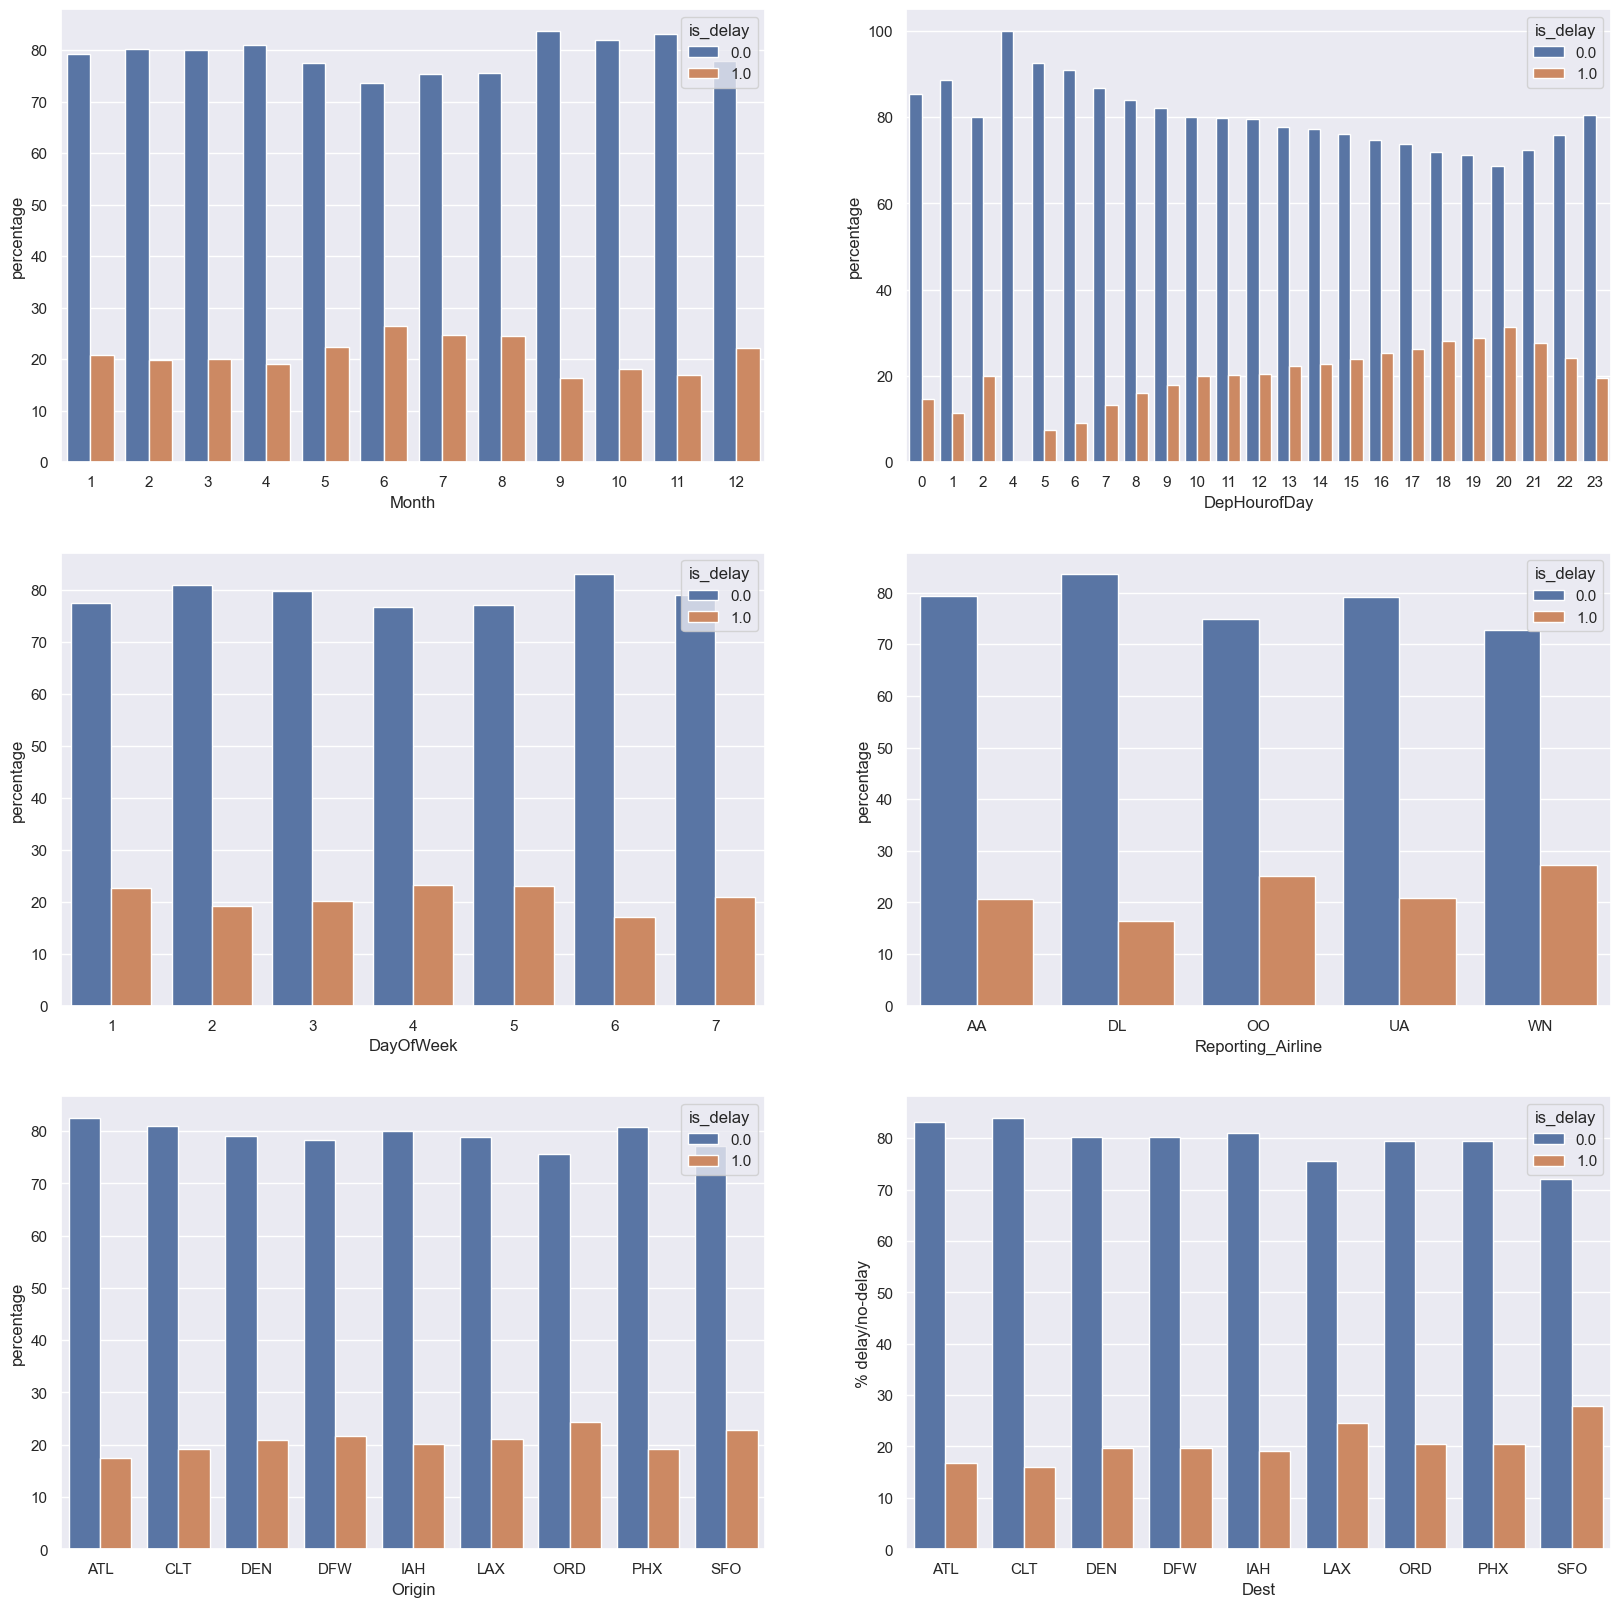

In [482]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

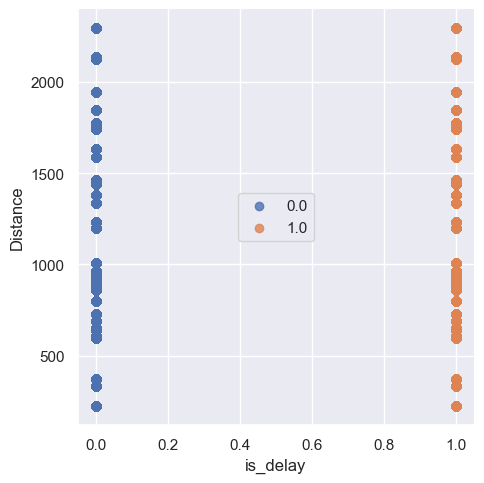

In [483]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

#### Questions

#### 1. Which months have the most delays?

By looking at the plot we can say that most delays have been in the months 6, 7 and 8. Which is June, July and August.
Also we can see other months like May and December but they are not as high as the ones above.


#### 2. What time of the day has the most delays?

We can see most of the delays at 20:00 hours. which would be 8pm in 12 hour time format.
There is not much of significant difference between the hours. Either there is gradual increase or decrease.


#### 3. What day of the week has the most delays?

Day 1, 4, and 5 which i assume is Sunday, Wednesday, and Thursday has most delays.
We couldn't choose only one day, because the plots seem to appear on almost the same height.


#### 4. Which origin and destination airports have the most delays?

In Orgin airports, ORD and SFO have most delays.
In Destination airports, SFO and LAX have most delays.


#### 5. Is flight distance a factor in the delays?

The data does not show any particular pattern. It is safe to assume that the flight distance is not solely a factor for delays.
It could be other reasons as well. When we checked the delays, we understood that almost all plots show a gradual increase or gradual decrease in delays. Nothing Drastic to reveal an immediate pattern.


#### 6. Which airline had most delays?


WN was the reporting airline which had the most delays. Even OO airline stands second in terms of the delays.


### Features

Look at all the columns and what their specific types are.

In [484]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [485]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [486]:
#We just check the column values and it's counts
data['DepHourofDay'].value_counts()

DepHourofDay
7     114027
8     111756
10    106613
12    104212
17    103459
14    103111
13    101740
9     100839
11     99172
16     96593
15     96318
6      91493
19     85429
18     83378
20     63304
22     47999
5      44234
21     41417
23     19033
0      16233
1       5047
2        160
4         23
Name: count, dtype: int64

In [487]:
#In this step we have to filter the required columns and treat 'DepHourofDay' as categorical column.

#We import copy library
import copy

#We create a deep copy of our original data
data_orig = copy.deepcopy(data)

#We filter the data
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]

#'DepHourofDay' has too many values to be considered as a category.
#We have to break it down as buckets and then split them into categories to have less columns.

#We create buckets for the data
buckets = [0,6,12,18,24]

#We give labels to match those buckets
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

#We induce the labels in the data to replace the values of 'DepHourofDay'
data['DepHourofDay'] = pd.cut(data['DepHourofDay'], bins= buckets, labels=labels, include_lowest=True, right=False)

#We take out the categorical columns
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']

#We define the categorical columns as category.
for c in categorical_columns:
    data[c] = data[c].astype('category')# Enter your code here

In [488]:
#We check to see if the data is right
data['DepHourofDay'].value_counts()

DepHourofDay
Morning      623900
Afternoon    605433
Evening      340560
Night         65697
Name: count, dtype: int64

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [489]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [490]:
len(data)

1635590

In [491]:
data.columns

Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

In [492]:
data.head(10)

,is_delay,Distance,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,Month_6,...,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,DepHourofDay_Morning,DepHourofDay_Afternoon,DepHourofDay_Evening
0,0.0,689.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0.0,731.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.0,1199.0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.0,1587.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,0.0,1587.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0.0,226.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,0.0,1199.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,0.0,689.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,0.0,226.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9,0.0,226.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [493]:
#We rename the column name
data.rename(columns = {'is_delay':'target'}, inplace=True )

In [494]:
#We check the data to see if we have the right data.
data.head()

,target,Distance,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,Month_6,...,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,DepHourofDay_Morning,DepHourofDay_Afternoon,DepHourofDay_Evening
0,0.0,689.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0.0,731.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.0,1199.0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.0,1587.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,0.0,1587.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [495]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B

#We save the data as a csv file
data.to_csv('combined_csv_v1.csv', index = False) 

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [496]:
#We import the important libraries for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [497]:
#We define the X and y variable for the model
X = data.drop('target', axis = 1)
y = data['target']

#we conduct 80 and 20 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

### Baseline classification model

In [498]:
#We build our baseline model
Log_regression = LogisticRegression(max_iter=1000)
Log_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [499]:
#We predict the values on the test set
y_pred = Log_regression.predict(X_test)

accuracy_score(y_test,y_pred)

0.7910111947370674

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [500]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    conf_matrix = confusion_matrix(test_labels, target_predicted)
    
    plt.figure(figsize=(10,6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap= "Blues", linewidths= 0.5)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [501]:
from sklearn import metrics

def plot_roc(test_labels, target_predicted):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color = "darkorange", lw = 2, label = f" ROC curve (area = {roc_auc:.2f})")
    plt.plot([0,1],[0,1], color = "navy", lw = 2, linestyle = "--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc = "lower right")
    plt.title("Receiver Operating Charteristic")
    plt.show

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

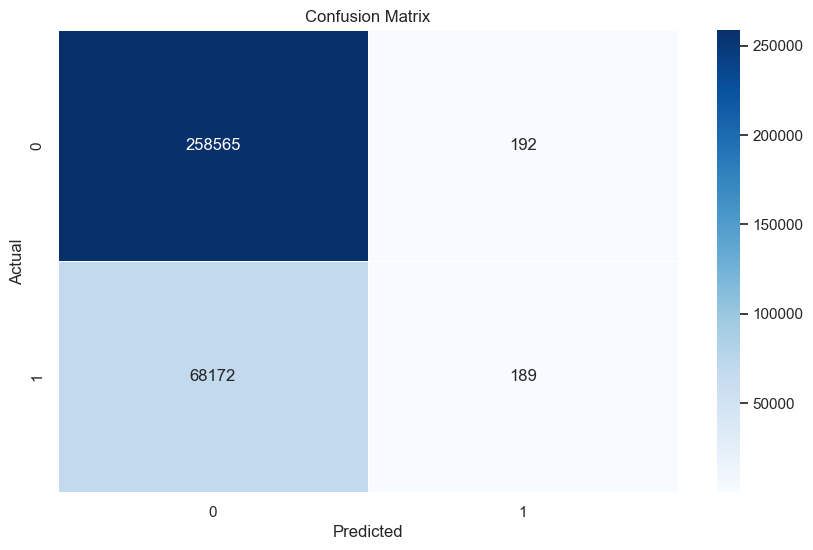

In [502]:
plot_confusion_matrix(y_test, y_pred)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

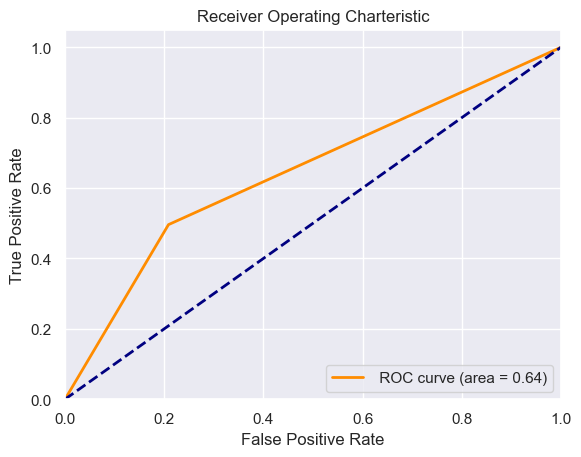

In [503]:
plot_roc(y_pred, y_test)

In [504]:
class_report = classification_report(y_test,y_pred)

print(class_report)

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258757
         1.0       0.50      0.00      0.01     68361

    accuracy                           0.79    327118
   macro avg       0.64      0.50      0.44    327118
weighted avg       0.73      0.79      0.70    327118



### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


The true positives are 189, false positives is 192. True negatives are 258,565 and false negatives are 68,172.

The accuracy of the model is relatively high, meaning that a sizeable part of the samples are accurately classfied.

Although there is potential for improvement, the precision indicates that the model can predict the positive class with a reasonable degree of accuracy.

Recall is low, meaning that a significant proportion of real possible events are missed by the model. This might use some improvement. The model has exceptional specificity, accurately identifying the negative class with a high degree of precision.

In conclusion, the model is promising but may still need to be further optimized, especially in terms of enhancing recall to better catch positive examples. The particular objectives and specifications of the classification task will determine which metrics to prioritize.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [505]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### We have added indicator variable for holidays
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate']).dt.strftime('%Y-%m-%d')
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays)

In [506]:
#We just check to see the data
data_orig['is_holiday'].value_counts()

is_holiday
False    1591678
True       43912
Name: count, dtype: int64

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [507]:
# download data from the link above and place it into the data folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [528]:
#We load the downloaded data
weather = pd.read_csv('daily-summaries.csv') # Enter your code here to read 'daily-summaries.csv' file

#We impute the station and aiport values for the data
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = {station[i]: airports[i] for i in range(len(station))}
weather['airport'] = weather['STATION'].map(station_map)

In [529]:
#We check to see if the data has been mapped properly
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX


In [530]:
#We check to see if we have all the values
weather['airport'].value_counts()

airport
LAX    1826
DEN    1826
ORD    1826
ATL    1826
SFO    1826
DFW    1826
PHX    1826
CLT    1826
Name: count, dtype: int64

Create another column called `MONTH` from the `DATE` column.

In [531]:
#We create another column called month
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [532]:
#To analyze the NA values, we check them once.
#We see that all of the values are zero if not NaN.
#We can impute the NA values as zero.
weather[['SNOW', 'SNWD']].value_counts

<bound method DataFrame.value_counts of        SNOW  SNWD
0       NaN   NaN
1       NaN   NaN
2       NaN   NaN
3       NaN   NaN
4       NaN   NaN
...     ...   ...
14603   0.0   0.0
14604   0.0   0.0
14605   0.0   0.0
14606   0.0   0.0
14607   0.0   0.0

[14608 rows x 2 columns]>

In [533]:
#We set the fill value to zero
fillvalue = 0

In [534]:
#We fill the NA value with our default value
weather.SNOW.fillna(fillvalue, inplace=True)
weather.SNWD.fillna(fillvalue, inplace=True)

#We check for other NA values in the data
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [535]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]
TAVG_idx

array([ 2130,  2131,  2132,  2133,  2134,  2135,  2136,  2137,  2138,
        2139,  2140,  2141,  2142,  2143,  2144,  2145,  2146,  2147,
        2148,  2149,  2150,  2151,  2152,  2153,  2154,  2155,  2156,
        2157,  2158,  2159,  2191,  2192,  2193,  2194,  2195,  2196,
        2197,  2198,  2199,  2200,  2201,  2202,  2203,  2204,  2205,
        2206,  2207,  2208,  2209,  2210,  2211,  2212,  2213,  2214,
        2215,  2216,  2217,  2218,  2219,  2220,  2221, 11594])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [536]:
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,0.0,0.0,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,0.0,0.0,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,0.0,0.0,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,0.0,0.0,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,0.0,0.0,151.0,244.0,83.0,LAX,01


In [537]:
#We impute the NA values by replacing them with average values for particular airports
weather_impute = weather.groupby(['MONTH', 'STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()
weather_impute.head(2)

,MONTH,STATION,TAVG,TMAX,TMIN
0,01,USW00003017,-2.741935,74.000000,-69.858065
1,01,USW00003927,79.529032,143.767742,20.696774


Merge the mean data with the weather data.

In [538]:
### get the yesterday's data

#We merge the data based on aiport, as that is the common column between these two datasets.
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

In [539]:
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG
0,USW00023174,2014-01-01,16,0,0.0,0.0,131.0,178.0,78.0,LAX,01,148.619355,198.154839,103.477419
1,USW00023174,2014-01-02,22,0,0.0,0.0,159.0,256.0,100.0,LAX,01,148.619355,198.154839,103.477419
2,USW00023174,2014-01-03,17,0,0.0,0.0,140.0,178.0,83.0,LAX,01,148.619355,198.154839,103.477419
3,USW00023174,2014-01-04,18,0,0.0,0.0,136.0,183.0,100.0,LAX,01,148.619355,198.154839,103.477419
4,USW00023174,2014-01-05,18,0,0.0,0.0,151.0,244.0,83.0,LAX,01,148.619355,198.154839,103.477419


Check for missing values again.

In [540]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [541]:
#We drop the columns as requested.
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [542]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [543]:
#We check the NA values
sum(data_orig.isna().any())

8

In [547]:
#We have NA values in 8 columns
data_orig.isna().sum()

Year                      0
Quarter                   0
Month                     0
DayofMonth                0
DayOfWeek                 0
FlightDate                0
Reporting_Airline         0
Origin                    0
OriginState               0
Dest                      0
DestState                 0
CRSDepTime                0
Cancelled                 0
Diverted                  0
Distance                  0
DistanceGroup             0
ArrDelay                  0
ArrDelayMinutes           0
is_delay                  0
AirTime                   0
DepHourofDay              0
is_holiday                0
AWND_O               132177
PRCP_O               132177
SNOW_O               132177
TAVG_O               132177
AWND_D               131646
PRCP_D               131646
SNOW_D               131646
TAVG_D               131646
dtype: int64

In [548]:
#We fill the NA values with median data as it is sensitive to outliers. 
#Also only 8% of those columns were filled with NA values.
columns_to_fill = ['AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'SNOW_D', 'TAVG_D']
median_values = data_orig[columns_to_fill].median()

data_orig[columns_to_fill] = data_orig[columns_to_fill].fillna(median_values)

In [552]:
data_orig.isna().sum()

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
AirTime              0
DepHourofDay         0
is_holiday           0
AWND_O               0
PRCP_O               0
SNOW_O               0
TAVG_O               0
AWND_D               0
PRCP_D               0
SNOW_D               0
TAVG_D               0
dtype: int64

In [553]:
#We check the columns of the data
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [554]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [555]:
#We have not used the sample code, because we have already defined our categorical columns, we don't want to do that again.
#The sample code has an error in it. categorical_columns.remove won't work because it is a list.
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [556]:
#We check the columns to match with the sample columns output
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [557]:
#We rename the column
data.rename(columns = {'is_delay':'target'}, inplace=True )

In [558]:
#We check to see if the data is right.
data.head()

,target,Distance,DepHourofDay,AWND_O,PRCP_O,TAVG_O,AWND_D,PRCP_D,TAVG_D,SNOW_O,...,Origin_SFO,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,is_holiday_True
0,0.0,689.0,21,33.0,0.0,54.0,36.0,0.0,173.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,0.0,731.0,9,39.0,0.0,136.0,33.0,0.0,54.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,1199.0,18,33.0,0.0,54.0,77.0,0.0,68.0,0.0,...,False,False,True,False,False,False,False,False,False,False
3,0.0,1587.0,16,33.0,0.0,54.0,20.0,0.0,165.0,0.0,...,False,False,False,False,False,False,False,True,False,False
4,0.0,1587.0,7,20.0,0.0,165.0,33.0,0.0,54.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [560]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B

data.to_csv('combined_csv_v2.csv', index = False)

Create the training and testing sets again.

### Train Test Split

In [561]:
#We define the X and y variable for the model
X = data.drop('target', axis = 1)
y = data['target']

#we conduct 80 and 20 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [562]:
# Instantiate another logistic regression model
classifier2 = LogisticRegression(max_iter=1000)
classifier2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [563]:
#We predict the values on the test set
y_pred = classifier2.predict(X_test)

accuracy_score(y_test,y_pred)

0.793120525315024

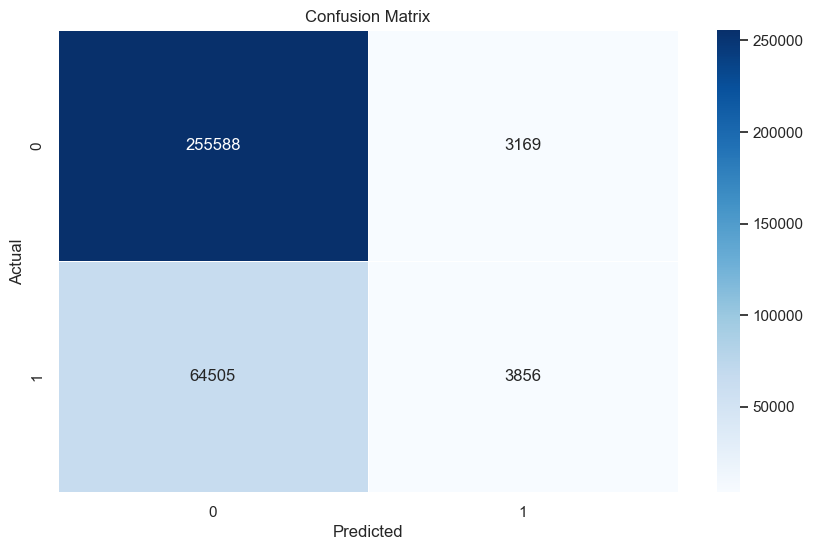

In [564]:
#We plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)

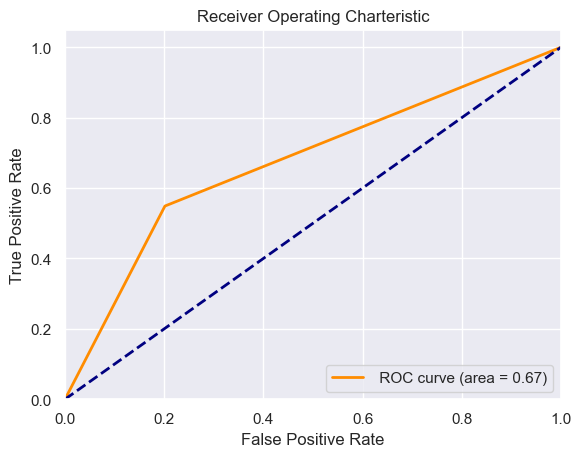

In [567]:
#Let's plot the ROC
plot_roc(y_pred, y_test)

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

#### Question: did you notice a difference by adding the extra data on the results?

We can say that using a 2nd classfier with additional data, has not shown us much of a difference. There has been an very slight increase in the 2nd model. But nothing too significant.

The model is still 79% accurate. Atleast we can see in the confusion matrix that, the true positives have increased. But we need to understand that the data is huge. So slight changes might not make any big differences.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [19]:
# copy the link here

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

1. We can say that both the both models performed almost the same. They both gave us 79% accuracy. Both of the confusion matrix were also similar, the model was able to idenitify the variables correctly most of the time. We had higher number of True positive where we understand that the model was performing well. We could try tuning the model, to see if we can get better accuracy. But I feel that what we have received is fairly a good performance. This can definitely help us to reach our business goal. Like we saw in the data, the number of delays were very low. We didn't particularly find a sole reason for delays, all of the factors could be contributing factors.

2. When we added the weather details and holiday details in the data, we had more columns and factors to explore the data with. But the model didn't really show much differences, close to nothing. Both the models gave us almost the same accuracy score. I could state that, the model 2 perfomed slightly better then model 1, but again the difference is almost negligible. To improve the models, we did add in the the additional data, and also when we had a lot of NA values, instead of removing them, we did impute them so that we shouldn't lose data. This definitely showed us that model 2 performed well after imputing and making changes in the data.

3. In the project, it was definetly challenging work with the zipped files.I am dealing with a huge dataset, also this did give me a close to real world experience. Because in the real world, data would be messy and huge as well. Other factors was, we had to add in additional factors for the data to see if the flight was dealyed due to weather conditions, this is defintely a hard task. The collection of such data and matching the data with the flight information data was a little tricky. Eventhough we had two models performing, we received almost the same result. It was still hard for me to find out a particular reason for flights being delayed.

4. Data quality is a cruical step. Cleaning data, preprocessing data, and other factors is very important and the quality of the data has to be checked at every step, so that we don't end up getting wrong answers.
Feature Selection and engineering plays a very important role in the model's performance. Understanding the data or having proper domain knowledge could be the key to understand how to work and what to expect out of the data.
Selecting the right evaluation metrics, especially for imbalanced datasets. Model interpretability could be a very important skill, this might come in handy to explain the outcomes of your prediction to the stake holders.